In [152]:
import pandas as pd
import numpy as np

In [153]:
df = pd.read_csv(r"C:\Users\11vij\OneDrive\Desktop\Youtube_project\youtube_ad_revenue_dataset (2).csv")
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [155]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


In [156]:
df.duplicated().sum()

np.int64(2400)

In [157]:
df.dtypes

video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object

In [158]:
num_cols = ['views', 'likes', 'comments', 
            'watch_time_minutes', 'video_length_minutes', 
            'subscribers', 'ad_revenue_usd']

In [159]:
# Distribution plots
import matplotlib.pyplot as plt
import seaborn as sns

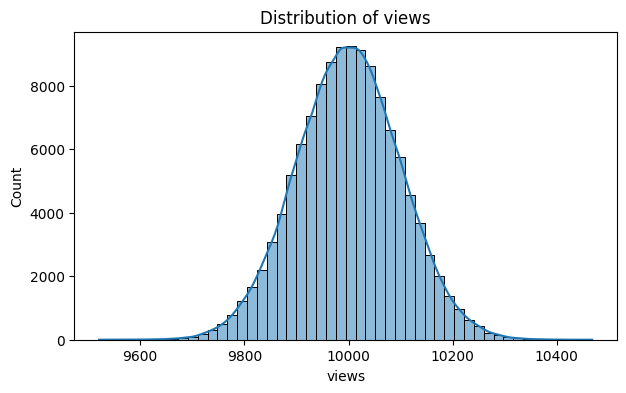

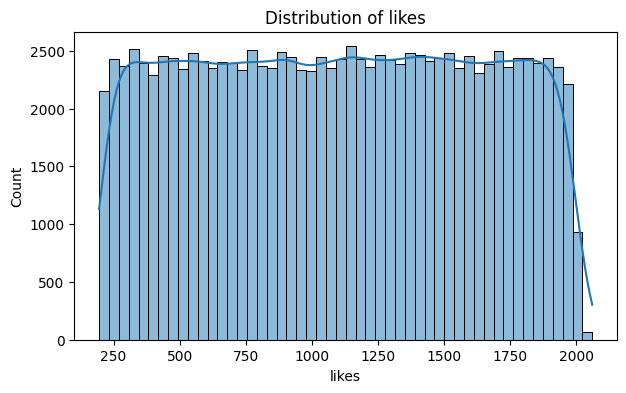

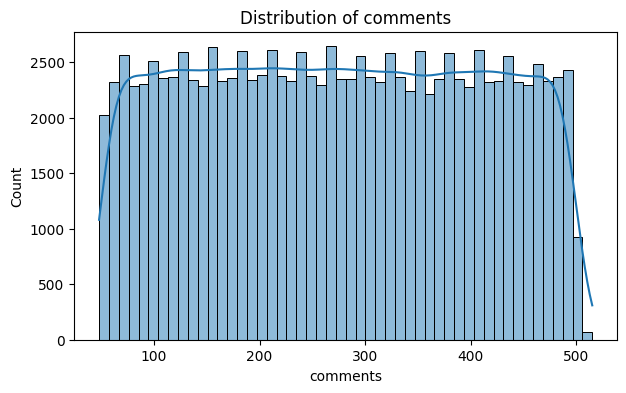

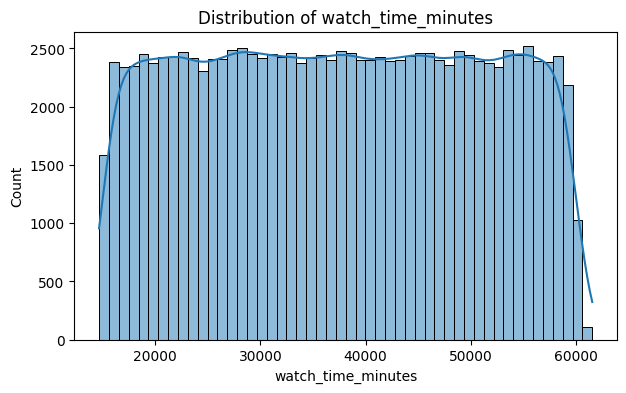

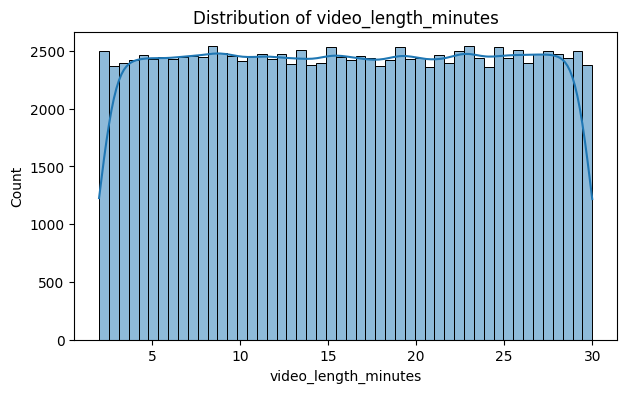

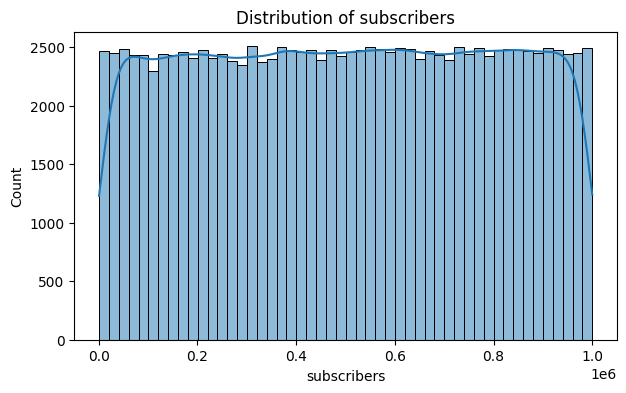

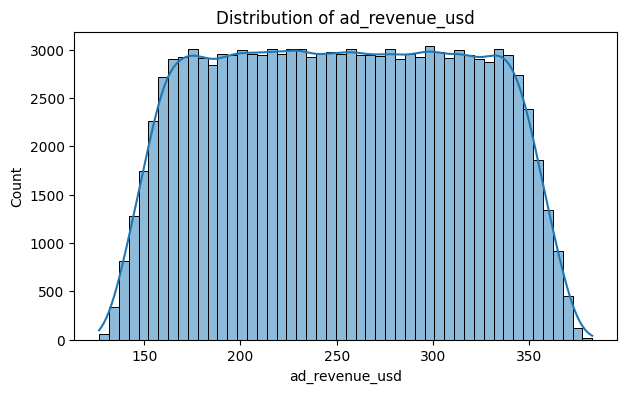

In [160]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

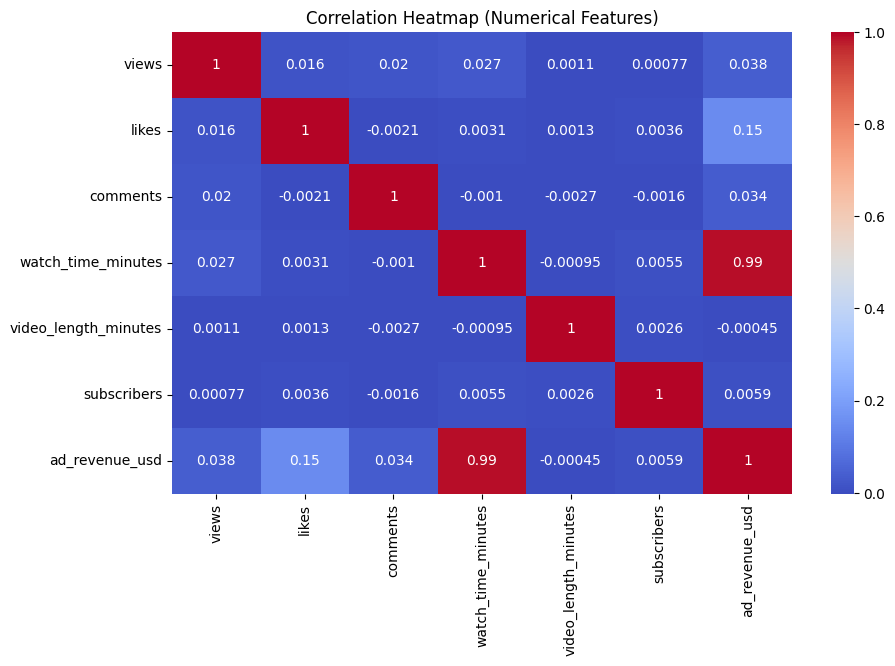

In [161]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

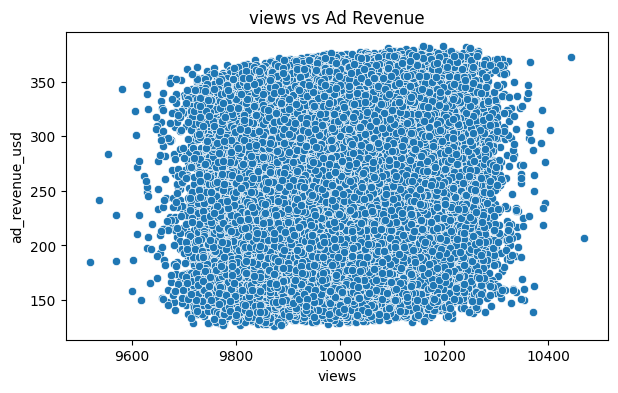

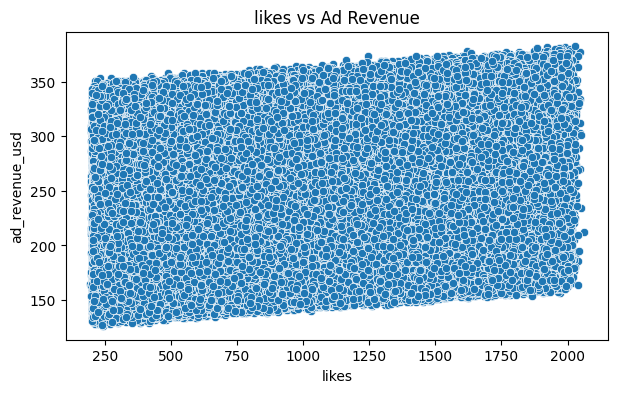

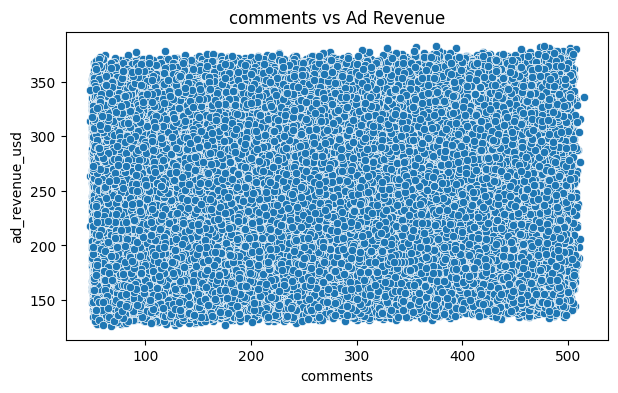

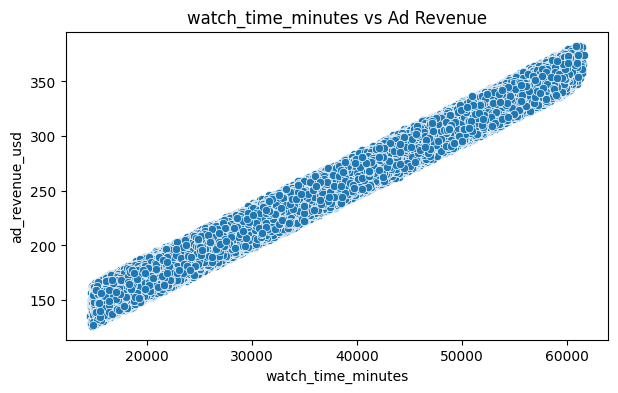

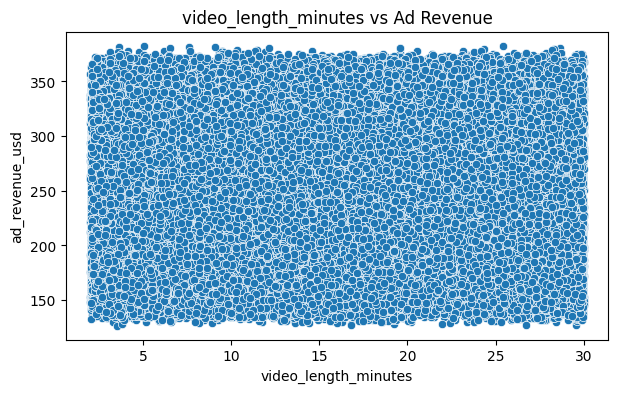

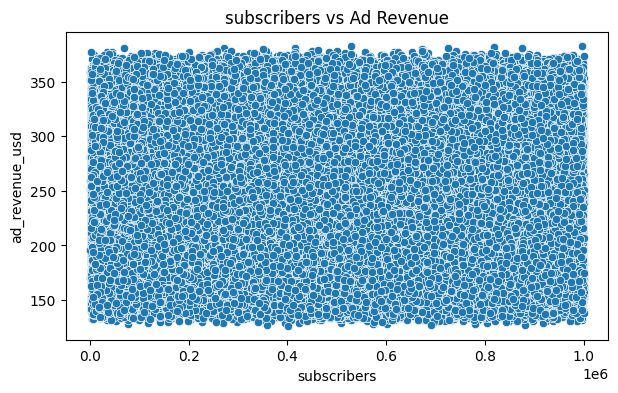

In [162]:
for col in num_cols[:-1]:  # exclude target
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=df[col], y=df['ad_revenue_usd'])
    plt.title(f"{col} vs Ad Revenue")
    plt.show()

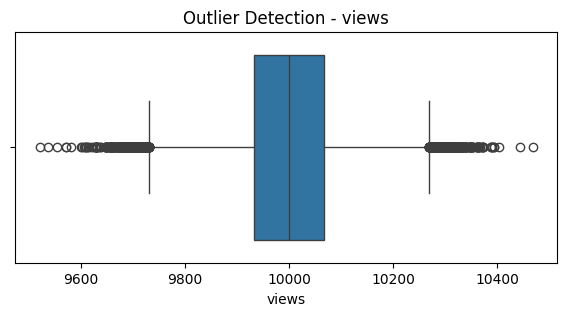

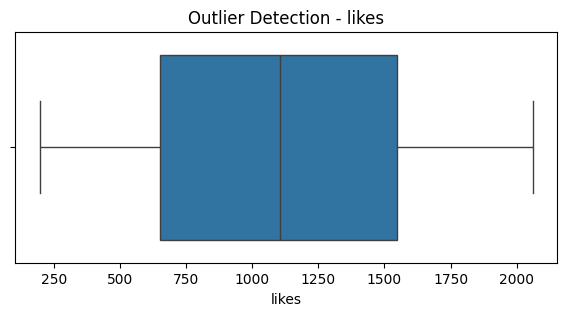

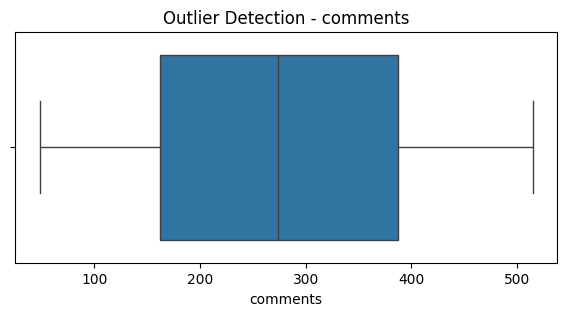

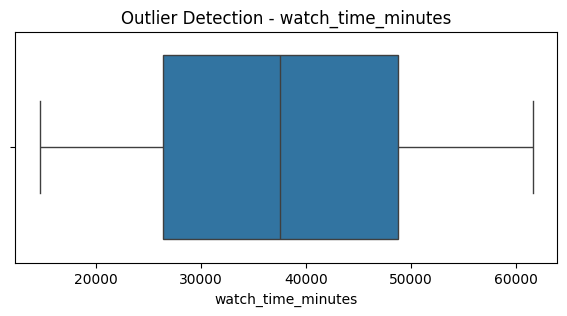

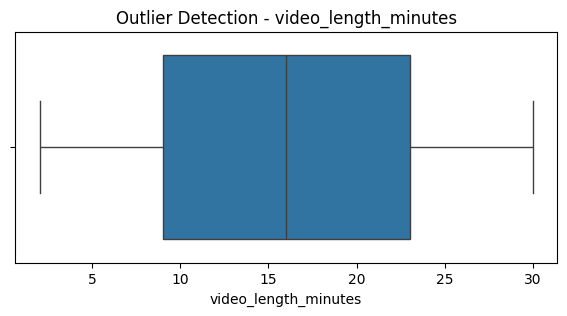

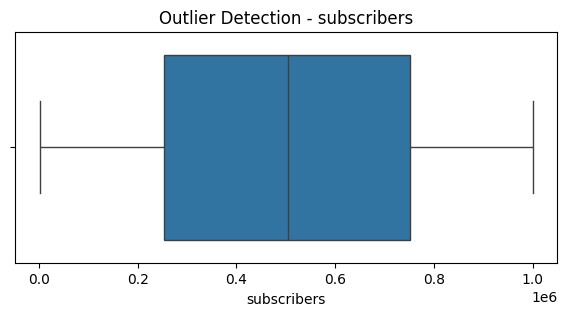

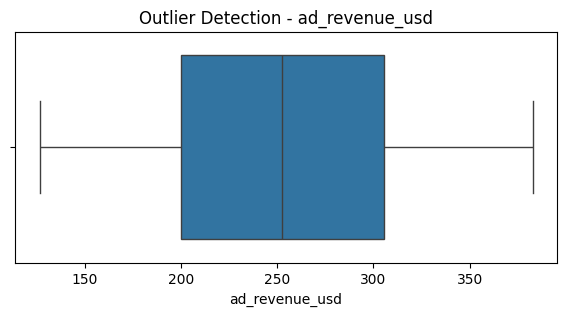

In [163]:
# Outlier detection
for col in num_cols:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection - {col}")
    plt.show()

In [164]:
# --- Categorical EDA ---

cat_cols = ['category', 'device', 'country']

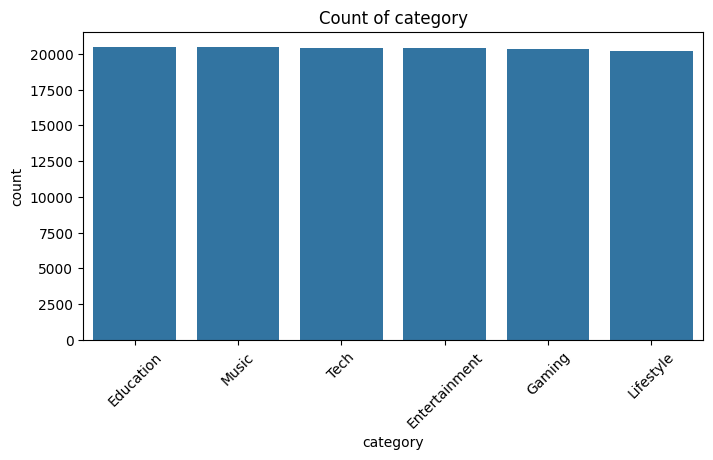

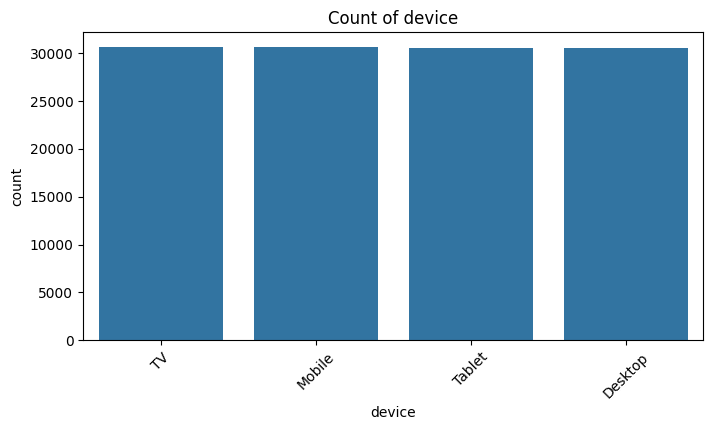

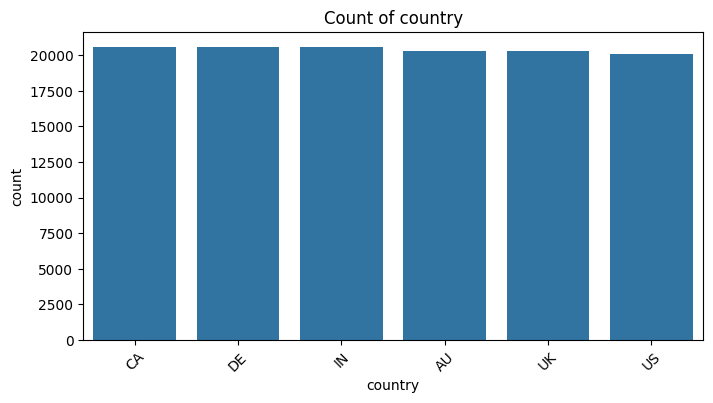

In [165]:
# Count plots
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()

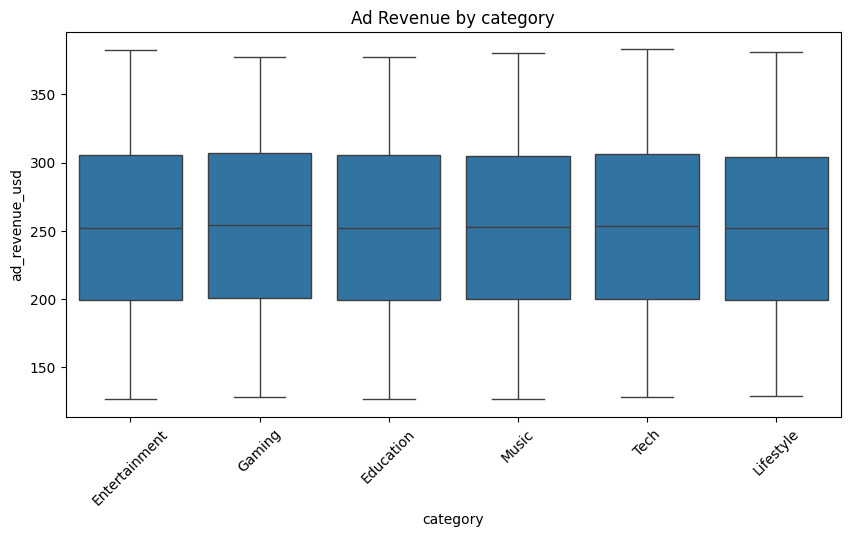

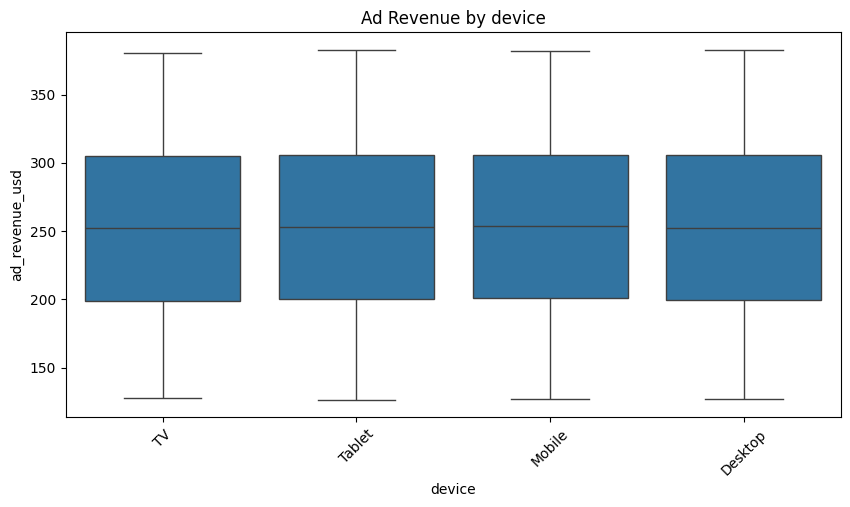

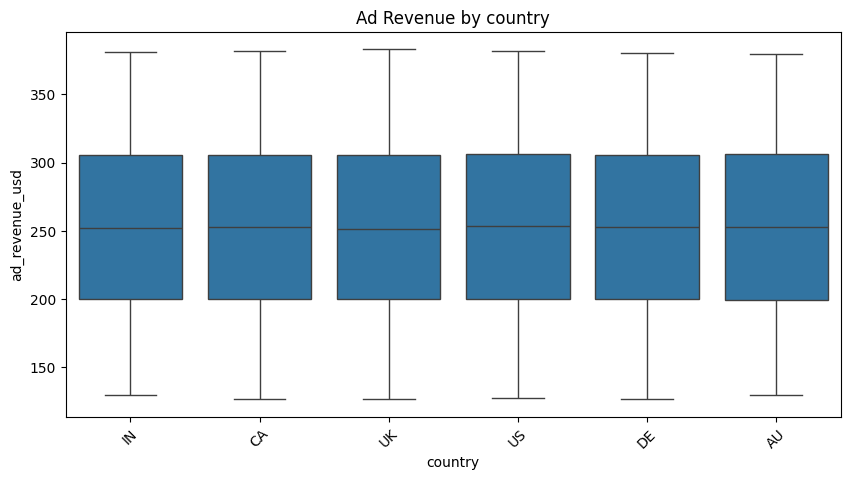

In [166]:
# Boxplots with target
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[col], y=df['ad_revenue_usd'])
    plt.xticks(rotation=45)
    plt.title(f"Ad Revenue by {col}")
    plt.show()

In [167]:
df.drop_duplicates(inplace=True)

In [168]:
df['likes']=df['likes'].fillna(df['likes'].mean())

In [169]:
df['comments']=df['comments'].fillna(df['comments'].mean())

In [170]:
df['watch_time_minutes']=df['watch_time_minutes'].fillna(df['watch_time_minutes'].mean())

In [171]:
df.count()

video_id                120000
date                    120000
views                   120000
likes                   120000
comments                120000
watch_time_minutes      120000
video_length_minutes    120000
subscribers             120000
category                120000
device                  120000
country                 120000
ad_revenue_usd          120000
dtype: int64

In [172]:
from sklearn.preprocessing import LabelEncoder

In [173]:
#1. Encode cat variables
cat_col=['category','device','country']
le=LabelEncoder()
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [174]:
#new column
df['engagement_rate']=(df['likes']+df['comments'])/df['views']

In [175]:
df['engagement_rate'].unique()


array([0.15509259, 0.09863233, 0.21451916, ..., 0.17496051, 0.09490112,
       0.16816406], shape=(111587,))

In [176]:
df['engagement_rate'].isnull().sum()


np.int64(0)

In [177]:
df['avg_watch_time_per_view'] = df['watch_time_minutes'] / df['views']

In [178]:
df['avg_watch_time_per_view'].isnull().sum()

np.int64(0)

In [179]:
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,avg_watch_time_per_view
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.000000,26497.214184,2.862137,228086,1,2,3,203.178237,0.155093,2.666789
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.000000,15209.747445,23.738069,736015,2,3,1,140.880508,0.098632,1.518393
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.000000,57332.658498,26.200634,240534,0,2,1,360.134008,0.214519,5.678187
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.000000,31334.517771,11.770340,434482,1,1,4,224.638261,0.142814,3.122834
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.000000,15665.666434,6.635854,42030,0,1,1,165.514388,0.236121,1.584151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.000000,42075.704885,25.490195,210818,0,3,5,280.986396,0.184715,4.270345
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.000000,57563.703040,16.229133,878860,4,0,4,354.612981,0.174961,5.683620
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,274.349842,27549.714659,23.822365,576756,5,3,1,203.643106,0.094901,2.683327
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.000000,56967.384382,7.753099,585138,4,1,4,351.525811,0.168164,5.563221


In [180]:
# Features & target
X = df.drop(columns=["ad_revenue_usd", "video_id", "date"], errors="ignore")
y = df["ad_revenue_usd"]

In [183]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Identify categorical & numeric columns
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(exclude=['object']).columns

# Preprocessor (OneHot encode categorical, keep numeric as is)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# Store results
results = []

# Loop through models
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
print(results_df)

               Model       MAE       RMSE        R2
0  Linear Regression  3.088809  13.478920  0.952582
1      Decision Tree  5.313814  19.547461  0.900273
2      Random Forest  3.567475  13.854534  0.949902
3  Gradient Boosting  3.625085  13.523214  0.952270
4            XGBoost  4.187152  14.095339  0.948146


In [185]:
# Columns
num_features = ["views", "likes", "comments", "watch_time_minutes",
                "video_length_minutes", "subscribers",
                "engagement_rate", "avg_watch_time_per_view"]

cat_features = ["category", "device", "country"]

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [188]:
# Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

In [189]:
# Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

In [190]:
# Train
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [191]:
# Save pipeline
import joblib
joblib.dump(pipeline, "Linear Regression.pkl")
print("✅ Final pipeline saved as Linear Regression.pkl")

✅ Final pipeline saved as Linear Regression.pkl
